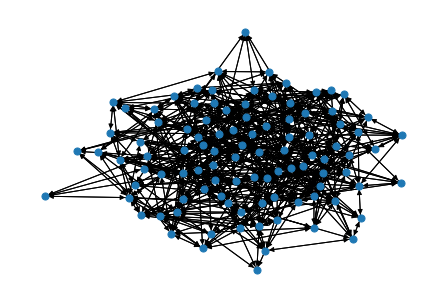

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import dgl

N = 100  # number of nodes
DAMP = 0.85  # damping factor
K = 10  # number of iterations
g = nx.nx.erdos_renyi_graph(N, 0.1)
g = dgl.DGLGraph(g)
nx.draw(g.to_networkx(), node_size=50)
plt.show()

In [6]:
g.ndata['pv'] = torch.ones(N) / N
g.ndata['deg'] = g.out_degrees(g.nodes()).float()
g.edata['w'] = torch.ones(g.number_of_edges())/2

In [11]:
def update(g):
    g.ndata['pv'] = g.ndata['pv'] / g.ndata['deg']
    g.update_all(message_func=fn.src_mul_edge('pv', 'w', 'm'),
                 reduce_func=fn.sum(msg='m', out='m_sum'))
    g.ndata['pv'] = (1 - DAMP) / N + DAMP * g.ndata['m_sum']

In [12]:
import dgl.function as fn
update(g)

In [10]:
dgl.__version__

'0.4.3post1'

In [13]:
g.ndata['pv']

tensor([0.0016, 0.0016, 0.0015, 0.0015, 0.0016, 0.0016, 0.0015, 0.0016, 0.0015,
        0.0016, 0.0015, 0.0015, 0.0016, 0.0015, 0.0015, 0.0015, 0.0016, 0.0016,
        0.0016, 0.0015, 0.0015, 0.0016, 0.0017, 0.0015, 0.0015, 0.0015, 0.0016,
        0.0015, 0.0015, 0.0016, 0.0015, 0.0015, 0.0016, 0.0017, 0.0015, 0.0015,
        0.0016, 0.0015, 0.0016, 0.0015, 0.0016, 0.0015, 0.0015, 0.0016, 0.0015,
        0.0015, 0.0015, 0.0015, 0.0016, 0.0016, 0.0016, 0.0015, 0.0016, 0.0015,
        0.0016, 0.0016, 0.0015, 0.0016, 0.0015, 0.0016, 0.0016, 0.0015, 0.0016,
        0.0016, 0.0015, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0016, 0.0015, 0.0015, 0.0015, 0.0015, 0.0016, 0.0016, 0.0015, 0.0016,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0016,
        0.0016, 0.0015, 0.0015, 0.0016, 0.0015, 0.0015, 0.0016, 0.0015, 0.0015,
        0.0015])

In [17]:
torch.Tensor(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [19]:
import pandas as pd
df = pd.read_table('test.txt')

In [20]:
df.groupby(['adgroupId','optimizationGoal']).apply(lambda x:x )

,adgroupId,optimizationGoal,delivery_ratioa,exp_name,timestamp
0,12345678,104,0.7,name1,20200506
1,12345679,104,0.8,name1,20200506
2,12345677,108,0.5,name1,20200506
3,12345678,104,0.7,name2,20200505
4,12345679,104,0.8,name2,20200505
5,12345677,108,0.5,name2,20200505


In [26]:
def group_ratio_with_exp_name(df):
    key_list = ['adgroupId','optimizationGoal']
    grouped = df.groupby(key_list)
    res_list = []
    for names, group in grouped:
        cur_value = group.drop(key_list, axis=1).to_dict("records")
        cur_dict = {}
        for cur_name, cur_key in zip(names, key_list):
            cur_dict[cur_key] = cur_name
        cur_dict["ratio_with_exp_name"] = cur_value
        res_list.append(cur_dict)
    df = pd.DataFrame(res_list)
    return df

In [36]:
group_ratio_with_exp_name(df)

,adgroupId,optimizationGoal,ratio_with_exp_name
0,12345677,108,"[{'delivery_ratioa': 0.5, 'exp_name': 'name1',..."
1,12345678,104,"[{'delivery_ratioa': 0.7, 'exp_name': 'name1',..."
2,12345679,104,"[{'delivery_ratioa': 0.8, 'exp_name': 'name1',..."


In [63]:
def func(x):
    key_list = ['delivery_ratioa','exp_name','timestamp']
    value_list = []
    for col in key_list:
        value_list.append(list(x[col]))
    res = [{key_list[j]:value_list[j][i] for j in range(len(key_list))} for i in range(len(x))]
    return res
df.groupby(['adgroupId','optimizationGoal']).apply(lambda x: func(x)).reset_index()[0][0]

In [67]:
df.groupby(['adgroupId','optimizationGoal']).apply(lambda x: func(x)).reset_index()[0][0]

[{'delivery_ratioa': 0.5, 'exp_name': 'name1', 'timestamp': 20200506},
 {'delivery_ratioa': 0.5, 'exp_name': 'name2', 'timestamp': 20200505}]